# Testing Mango

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
from tuner import Tuner

In [3]:
from scipy.stats import uniform

param_dict = {"learning_rate": uniform(0.01, 0.5),
              "gamma": uniform(0.5, 0.5),
              "max_depth": range(1,14),
              "n_estimators": range(500,2000),
              "subsample": uniform(0.7, 0.3),
              "colsample_bytree":uniform(0.3, 0.7),
              "colsample_bylevel":uniform(0.3, 0.7),
              "min_child_weight": range(1,10)}


# userObjective

In [4]:
from classifiers.xgboosttree import Xgboosttree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import numpy as np

model = Xgboosttree()

X_train, y_train = model.load_train_dataset("../classifiers/data/PJME/train_data")
X_test, y_test = model.load_train_dataset("../classifiers/data/PJME/test_data")
X_validate, y_validate = model.load_train_dataset("../classifiers/data/PJME/validate_data")



count_called = 1

def objective_Xgboost(args_list):
    global X_train, y_train, model, count_called
    
    print('count_called:',count_called)
    
    count_called = count_called + 1
    results = []
    for hyper_par in args_list:
        clf = Xgboosttree(**hyper_par)
        clf.fit(X_train, y_train.ravel())
        y_pred = clf.predict(X_validate) 
        mse = mean_squared_error(y_validate, y_pred)
        mse = mse/10e5
        result =  (-1.0) * mse
        results.append(result)
        
    return results

In [5]:
conf_Dict = dict()
conf_Dict['batch_size'] = 1
conf_Dict['num_iteration'] = 20
conf_Dict['domain_size'] = 10000

# Defining Tuner

In [6]:
tuner_user = Tuner(param_dict, objective_Xgboost,conf_Dict)

In [7]:
tuner_user.getConf()

{'param_dict': {'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1f9ee6d8>,
  'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1f9eed30>,
  'max_depth': range(1, 14),
  'n_estimators': range(500, 2000),
  'subsample': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1f9eeeb8>,
  'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1f9eec88>,
  'colsample_bylevel': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a1f9eee48>,
  'min_child_weight': range(1, 10)},
 'userObjective': <function __main__.objective_Xgboost(args_list)>,
 'domain_size': 10000,
 'initial_random': 1,
 'num_iteration': 20,
 'objective': 'maximize',
 'batch_size': 1}

In [8]:
import time
start_time = time.clock()

results = tuner_user.run()

end_time = time.clock()


print(end_time - start_time)

count_called: 1
[11:57:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 2
[11:57:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 3
[11:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 4
[11:57:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 5
[11:57:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 6
[11:57:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 7
[11:57:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_called: 8
[11:57:38] WARNING: src/objective/regression_obj.cu:152: reg

# Inspect the results

In [9]:
print('best hyper parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best hyper parameters: {'colsample_bylevel': 0.5381551448919908, 'colsample_bytree': 0.46703941743874944, 'gamma': 0.6745720811926422, 'learning_rate': 0.1649849263360949, 'max_depth': 1, 'min_child_weight': 7, 'n_estimators': 714, 'subsample': 0.8562607705381844}
best objective: -9.907414657566918


In [10]:
print('Sample hyper parameters tried:',len(results['hyper_parameters_tried']))
print(results['hyper_parameters_tried'][:2])

Sample hyper parameters tried: 21
[{'colsample_bylevel': 0.7483159321196018, 'colsample_bytree': 0.6592301997959462, 'gamma': 0.6929737804614406, 'learning_rate': 0.4133915380626376, 'max_depth': 12, 'min_child_weight': 6, 'n_estimators': 1775, 'subsample': 0.7977607498451018}, {'colsample_bylevel': 0.5044551810516603, 'colsample_bytree': 0.4472405365760038, 'gamma': 0.605727851629858, 'learning_rate': 0.4607908693033719, 'max_depth': 1, 'min_child_weight': 9, 'n_estimators': 715, 'subsample': 0.8094874225275678}]


In [11]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 21
[-15.31513860179957, -10.154808435852516, -14.80063421073045, -9.907414657566918, -10.035529710222846]


# Plotting the actual variation in objective values of the tried results

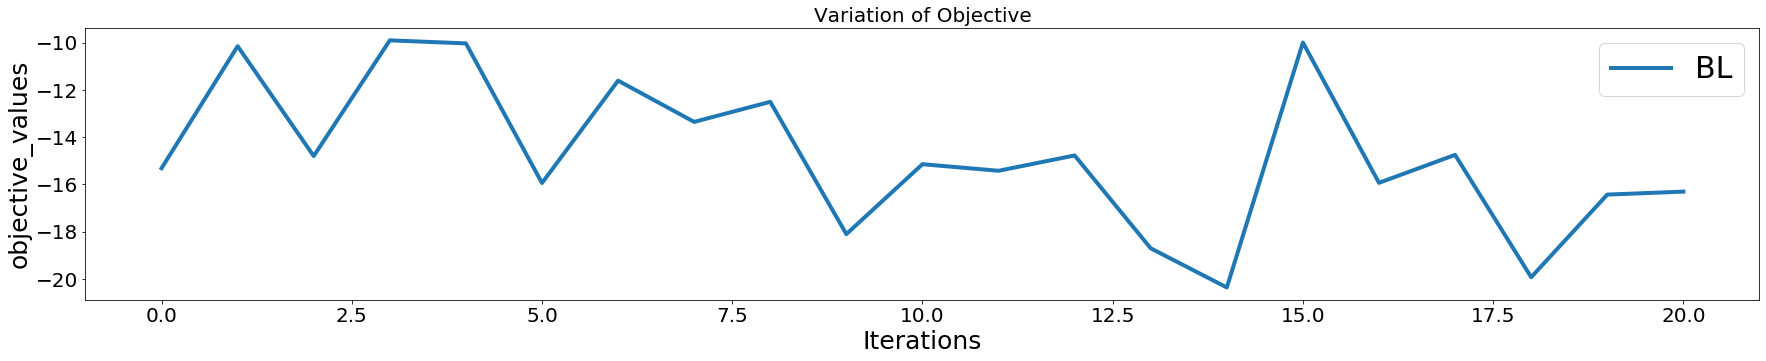

In [18]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

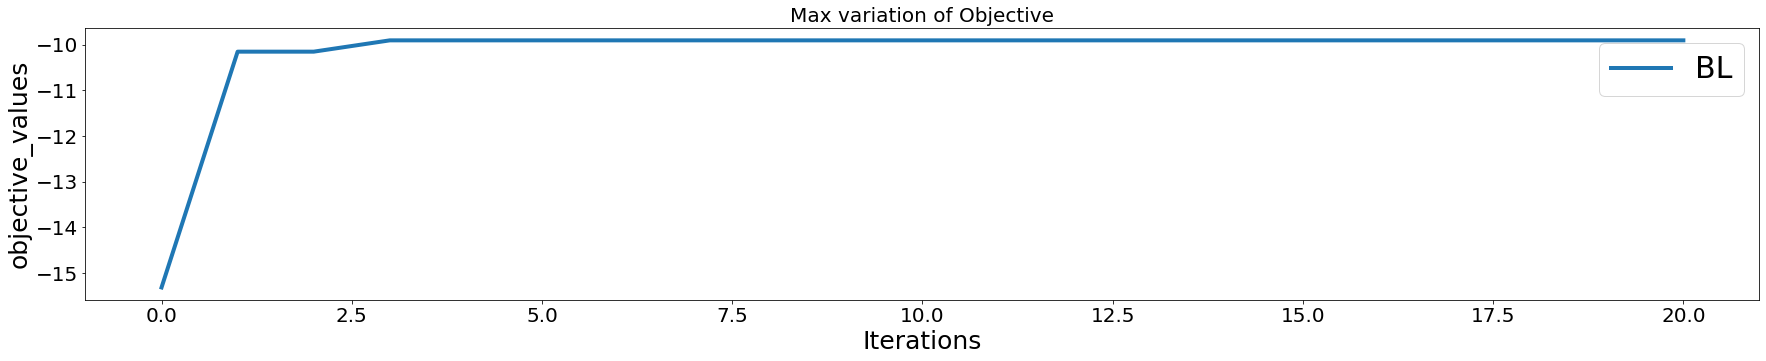

In [13]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [14]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_hyper_parameter': {   'colsample_bylevel': 0.5381551448919908,
                                'colsample_bytree': 0.46703941743874944,
                                'gamma': 0.6745720811926422,
                                'learning_rate': 0.1649849263360949,
                                'max_depth': 1,
                                'min_child_weight': 7,
                                'n_estimators': 714,
                                'subsample': 0.8562607705381844},
    'best_objective': -9.907414657566918,
    'hyper_parameters_tried': [   {   'colsample_bylevel': 0.7483159321196018,
                                      'colsample_bytree': 0.6592301997959462,
                                      'gamma': 0.6929737804614406,
                                      'learning_rate': 0.4133915380626376,
                                      'max_depth': 12,
                                      'min_child_weight': 6,
                                      'n_esti

# See the learned classifier result on the test data

In [15]:
model = Xgboosttree(**results['best_hyper_parameter'])
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test) 

[11:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


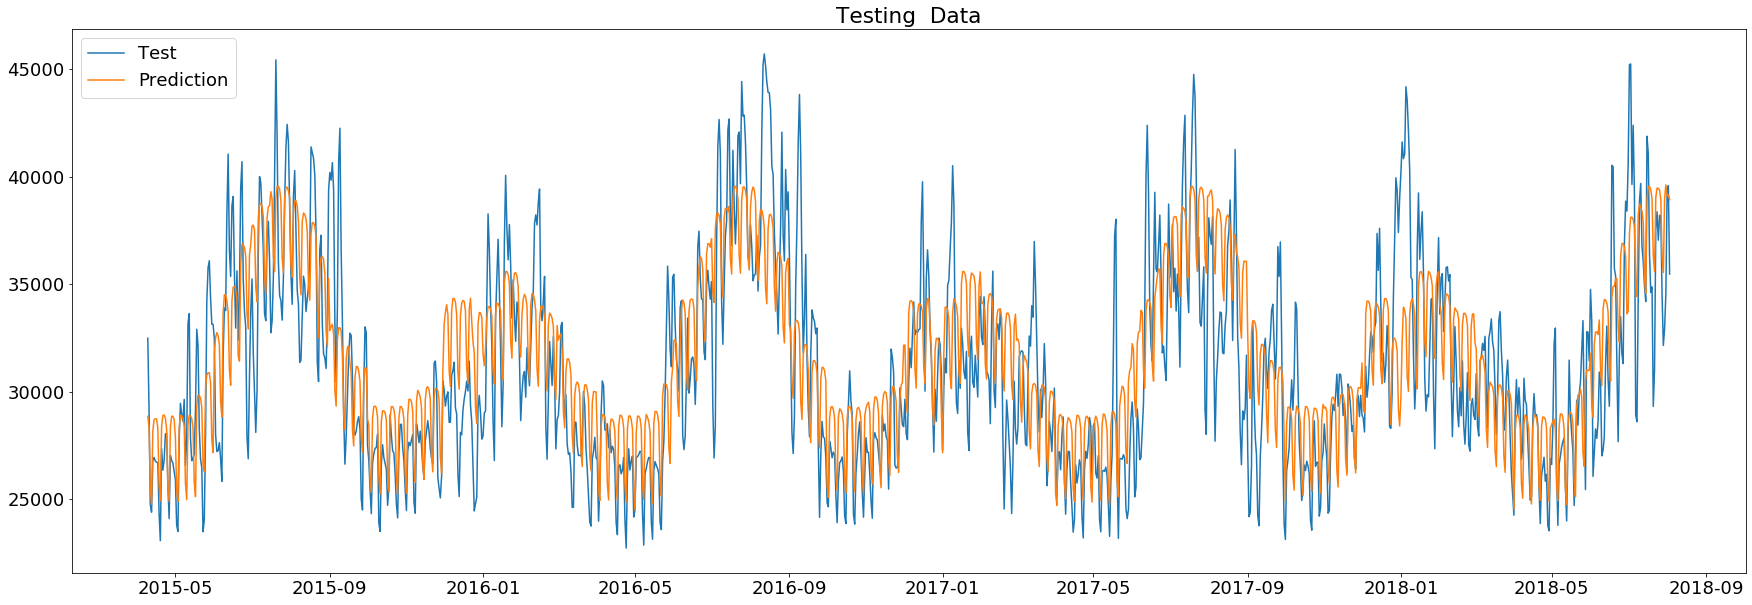

In [16]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})
plt.plot(X_test,y_test,label='Test')
plt.plot(X_test,y_pred,label='Prediction')
plt.title('Testing  Data')
plt.legend()
plt.show()

# All the Data

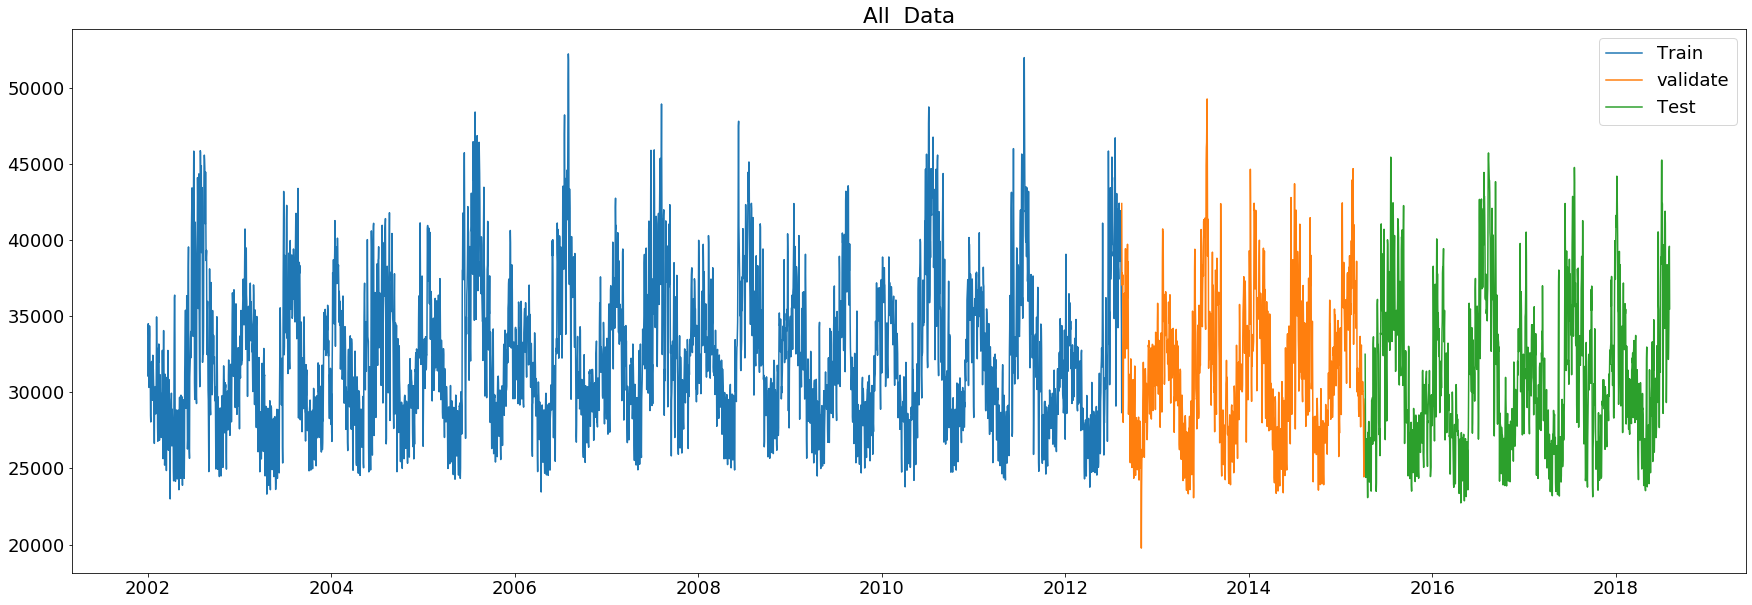

In [17]:
from classifiers.xgboosttree import Xgboosttree

model = Xgboosttree()

X_train, y_train = model.load_train_dataset("../classifiers/data/PJME/train_data")
X_test, y_test = model.load_train_dataset("../classifiers/data/PJME/test_data")
X_validate, y_validate = model.load_train_dataset("../classifiers/data/PJME/validate_data")



from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 18})
plt.plot(X_train,y_train,label='Train')
plt.plot(X_validate,y_validate,label='validate')
plt.plot(X_test,y_test,label='Test')
plt.title('All  Data')
plt.legend()
plt.show()
